In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./training_data_08-21-2022-20-45-58.csv')

# Analyse Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  2987 non-null   int64
 1   i_sensor_1  2987 non-null   int64
 2   i_sensor_2  2987 non-null   int64
 3   i_sensor_3  2987 non-null   int64
 4   o_left      2987 non-null   bool 
 5   o_right     2987 non-null   bool 
dtypes: bool(2), int64(4)
memory usage: 99.3 KB


<AxesSubplot:>

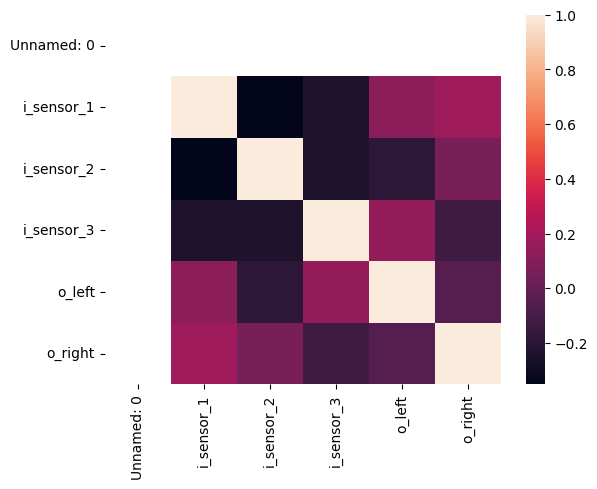

In [5]:
import seaborn as sns
sns.heatmap(df.corr())

# Scale/convert input values

In [6]:
df = df.astype({'o_left': int, 'o_right': int})   

In [7]:
df.head()

,Unnamed: 0,i_sensor_1,i_sensor_2,i_sensor_3,o_left,o_right
0,0,-1,189,79,0,0
1,0,-1,186,79,0,0
2,0,-1,182,79,0,0
3,0,-1,178,79,0,0
4,0,-1,174,79,0,0


In [8]:
df[df['o_left']==1]

,Unnamed: 0,i_sensor_1,i_sensor_2,i_sensor_3,o_left,o_right
745,0,-1,119,171,1,0
772,0,-1,85,195,1,0
782,0,197,80,201,1,0
797,0,173,-1,201,1,0
807,0,157,-1,201,1,0
...,...,...,...,...,...,...
2299,0,-1,109,81,1,0
2301,0,-1,99,77,1,0
2304,0,-1,92,79,1,0
2311,0,-1,90,81,1,0


# Set Train and test 

In [34]:
from sklearn.model_selection import train_test_split
X = df.drop(['o_left','o_right','Unnamed: 0'],axis=1).values
y = df[['o_left','o_right']].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

# Create neural network

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [88]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
model = Sequential()
X_train.shape

(2240, 3)

In [90]:
model.add(Dense(units=8, input_dim=3,activation='relu'))

model.add(Dense(units=8,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam')

# Train model

In [91]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/150
70/70 [==============================] - 0s 2ms/step - loss: 0.6779 - val_loss: 0.6628
Epoch 2/150
70/70 [==============================] - 0s 936us/step - loss: 0.6479 - val_loss: 0.6340
Epoch 3/150
70/70 [==============================] - 0s 951us/step - loss: 0.6195 - val_loss: 0.6069
Epoch 4/150
70/70 [==============================] - 0s 956us/step - loss: 0.5929 - val_loss: 0.5812
Epoch 5/150
70/70 [==============================] - 0s 942us/step - loss: 0.5677 - val_loss: 0.5572
Epoch 6/150
70/70 [==============================] - 0s 965us/step - loss: 0.5441 - val_loss: 0.5347
Epoch 7/150
70/70 [==============================] - 0s 952us/step - loss: 0.5219 - val_loss: 0.5135
Epoch 8/150
70/70 [==============================] - 0s 931us/step - loss: 0.5011 - val_loss: 0.4936
Epoch 9/150
70/70 [==============================] - 0s 940us/step - loss: 0.4815 - val_loss: 0.4750
Epoch 10/150
70/70 [==============================] - 0s 995us/step - loss: 0.4631 - val_loss

70/70 [==============================] - 0s 972us/step - loss: 0.1850 - val_loss: 0.1996
Epoch 82/150
70/70 [==============================] - 0s 1ms/step - loss: 0.1849 - val_loss: 0.1995
Epoch 83/150
70/70 [==============================] - 0s 975us/step - loss: 0.1848 - val_loss: 0.1994
Epoch 84/150
70/70 [==============================] - 0s 960us/step - loss: 0.1847 - val_loss: 0.1994
Epoch 85/150
70/70 [==============================] - 0s 960us/step - loss: 0.1846 - val_loss: 0.1993
Epoch 86/150
70/70 [==============================] - 0s 976us/step - loss: 0.1845 - val_loss: 0.1993
Epoch 87/150
70/70 [==============================] - 0s 966us/step - loss: 0.1844 - val_loss: 0.1993
Epoch 88/150
70/70 [==============================] - 0s 951us/step - loss: 0.1843 - val_loss: 0.1992
Epoch 89/150
70/70 [==============================] - 0s 959us/step - loss: 0.1843 - val_loss: 0.1992
Epoch 90/150
70/70 [==============================] - 0s 963us/step - loss: 0.1842 - val_loss: 0.

In [92]:
model_loss = pd.DataFrame(model.history.history)

In [1]:
model_loss.plot()

NameError: name 'model_loss' is not defined

In [110]:
car_game = CarGame(screen_size=(1600, 1200), car_speed=2, frame_rate=60,
                   road=RoadEnum.ONE, sensor_threshold=400, generate_train_data=False)

car_game.start_game()


KeyboardInterrupt: 

In [109]:
import numpy as np
import pygame

while car_game.game_over:
    input_model = np.array([[car_game.distance_sensor_1,car_game.distance_sensor_2,car_game.distance_sensor_3]])
    prediction = model.predict(input_model)
    
    print(prediction)
    
    if prediction[0][0] >= 0.5:
        newevent = pygame.event.Event(pygame.locals.KEYDOWN, key=pygame.K_LEFT)
        print('left')
    elif prediction[0][1] >= 0.5:
        newevent = pygame.event.Event(pygame.locals.KEYDOWN, key=pygame.K_RIGHT)
        print('right')
        
    pygame.event.post(newevent)
        
    
    
    
    

AttributeError: 'CarGame' object has no attribute 'game_over'

In [ ]:
newevent = pygame.event.Event(pygame.locals.KEYDOWN, key=pygame.K_RIGHT)
pygame.event.post(newevent)

In [ ]:
prediction = model.predict(input_model)

In [ ]:
prediction[0][1]

24/24 [==============================] - 0s 562us/step


array([0.37415695, 0.625843  , 0.37415695, ..., 0.625843  , 0.37415695,
       0.625843  ], dtype=float32)